In [1]:
import tensorflow as tf
tf.__version__
import tensorflow_addons as tfa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from os import path, listdir
import seaborn as sns

In [2]:
IMAGE_SHAPE = (224,224)

## Preprocessing

In [3]:
train_path = 'dataset/train'
test_path = 'dataset/test'
print(train_path)
print(test_path)

dataset/train
dataset/test


In [4]:
image_dir = path.join(train_path + '/Erick_Gozali')
images = listdir(image_dir)
images_path = [path.join(image_dir,images[i]) for i in range(len(images))]

In [5]:
images_array = [imread(img) for img in images_path]

In [6]:
widths = []
heights = []
colors = []
    
for img in images_array:    
    w, h, c = img.shape
    widths.append(w)
    heights.append(h)
    colors.append(c)

(array([  0.,   0.,   0.,   0.,   0., 125.,   0.,   0.,   0.,   0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

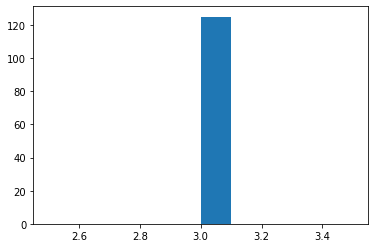

In [7]:
plt.hist(colors)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(shear_range=0.1,
                               fill_mode='nearest',
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range=30,
                               horizontal_flip=True,
                               rescale=1./255,)

In [9]:
train_dataset = image_gen.flow_from_directory(train_path,
                                              batch_size=32,
                                              class_mode='sparse',
                                              color_mode='rgb',
                                              shuffle=True,
                                              target_size=IMAGE_SHAPE)

Found 250 images belonging to 2 classes.


In [10]:
print('classes: {}'.format(train_dataset.class_indices))

classes: {'Daniel_Chrisna_Danuega': 0, 'Erick_Gozali': 1}


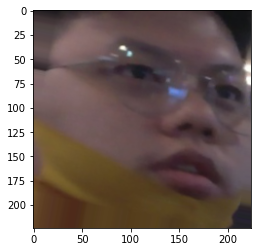

In [11]:
plt.imshow(train_dataset[0][0][2])

## Model temp


In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Lambda, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Conv2D(filters=512, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation=None))
model.add(Lambda(lambda x: tf.math.l2_normalize(x, axis=1)))

## Model

In [31]:
# import modelGold as model
# import model as AlexNet

In [32]:
# model = AlexNet.get_model()

In [33]:
model.compile(loss=tfa.losses.triplet_semihard_loss, 
              optimizer='adam')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 221, 221, 256)     12544     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 256)     0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 110, 110, 256)     1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 256)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 107, 107, 512)     2097664   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 512)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 128)      

In [35]:
early_stop = EarlyStopping(monitor='loss', patience=3)
checkpoint = ModelCheckpoint('best_model.h5', monitor='loss', save_best_only=True, verbose=1)

In [19]:
model.fit(train_dataset, epochs=5, callbacks=[early_stop, checkpoint])

Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 0.6266 
Epoch 00001: loss improved from inf to 0.62662, saving model to best_model.h5
8/8 [==============================] - 377s 47s/step - loss: 0.6266
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 0.5842 
Epoch 00002: loss improved from 0.62662 to 0.58417, saving model to best_model.h5
8/8 [==============================] - 375s 47s/step - loss: 0.5842
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.7768 
Epoch 00003: loss did not improve from 0.58417
8/8 [==============================] - 373s 47s/step - loss: 0.7768
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 0.7010 
Epoch 00004: loss did not improve from 0.58417
8/8 [==============================] - 374s 47s/step - loss: 0.7010
Epoch 5/5
8/8 [==============================] - ETA: 0s - loss: 0.7077 
Epoch 00005: loss did not improve from 0.58417
8/8 [==============================] - 372s 47s/step - loss: 0

In [36]:
from tensorflow.keras.models import load_model
model.save_weights('best_model_weights.h5')



In [ ]:
model.load_weights('best_model_weights.h5')